<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220614_ML05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습):
    * 지도학습(Supervised learning) : 레이블이 있는 데이터를 학습.
        * 분류(classification) : 클래스를 분류.
        * 회귀(regression) : 숫자 예측.
    * 비지도학습(Unsupervised learning) : 레이블이 없는 데이터를 학습.
    * 준지도학습(Semi-supervised learning) : 비지도학습 + 전문가 시스템.
    * 강화학습(Reinforcement learning) : 보상과 벌칙을 통해서 학습.

# Objectives

fish 데이터 셋에서 물고기의 무게(Weight) 예측.
* Perch(농어)의 무게를 길이 특성만으로 예측.
    * Weight(관심 변수, 종속 변수, 레이블) ~ Length(독립 변수, 특성)
    * KNN, Linear Regression
* Perch(농어)의 무게를 모든 특성들을 사용해서 예측.
    * Weight ~ Length + Diagonal + Height + Width
    * Linear Regression

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 훈련 / 테스트 셋 분리
from sklearn.preprocessing import StandardScaler # 특성 스케일링(표준화)
from sklearn.preprocessing import PolynomialFeatures # 다차항을 추가해주는 변환기
from sklearn.pipeline import Pipeline # Transformer(변환기)와 Estimator(예측기)를 연결해주는 
from sklearn.neighbors import KNeighborsRegressor # KNN 알고리즘을 사용한 숫자 예측
from sklearn.linear_model import LinearRegression # 선형 회귀를 사용한 숫자 예측
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # 회귀 평가 지표들

# 데이터 준비

In [2]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'
fish = pd.read_csv(fish_csv)

In [3]:
# perch(농어) 데이터 셋
perch = fish[fish.Species == 'Perch']

In [4]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


농어의 무게(Weight)를 길이(Length)만으로 예측할 수 있을까?
*  특성(feature), 독립 변수 : Length
*  타겟(target), 레이블(label), 종속(관심) 변수 : Weight

In [5]:
# X : 특성 (2차원) 배열 - 독립 변수, y : 타겟 (1차원) 배열 - 종속 변수
X = perch[['Length']].values.copy() # (56, 1) shape의 2차원 배열
y = perch['Weight'].values.copy() # (56,) shape의 1차원 배열

In [6]:
X.shape, y.shape

((56, 1), (56,))

# Train / Test Split

In [7]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [8]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 1), (14, 1), (42,), (14,))

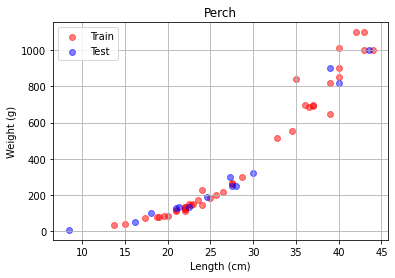

In [9]:
# Weight ~ Length 시각화. 훈련 셋 / 테스트 셋의 색깔을 다르게.
plt.scatter(X_tr, y_tr, label='Train', color='red', alpha=0.5)
plt.scatter(X_te, y_te, label='Test', color='blue', alpha=0.5)

plt.legend()
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.title('Perch')
plt.show()

# KNN Regressor Model 훈련, 평가

KNN(k-Nearest Neighbors) Regressor : 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측하는 모델.

In [10]:
knn_reg = KNeighborsRegressor() # k=5인 KNN 회귀 모델을 생성

In [11]:
knn_reg.fit(X_tr, y_tr) # 모델 훈련

KNeighborsRegressor()

In [12]:
tr_pred = knn_reg.predict(X_tr) # 훈련 셋 예측값 - 훈련 셋 농어의 무게
tr_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [13]:
y_tr

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [88]:
# 0번 훈련 셋 샘플의 가장 가까운 이웃 5개
neighbor_index = knn_reg.kneighbors(X_tr[0].reshape((1, -1)), return_distance=False)
neighbor_index

array([[ 0, 10, 36,  2, 31]])

In [15]:
y_tr[neighbor_index[0]].mean()

88.6

In [16]:
# 테스트 셋의 예측값
te_pred = knn_reg.predict(X_te)
te_pred

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [17]:
# 테스트 셋의 실젯값
y_te

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [18]:
neighbor_index = knn_reg.kneighbors(X_te[0].reshape((1, -1)), return_distance=False)
neighbor_index

array([[23, 25,  3,  2, 36]])

# 회귀 모델 평가 지표

*  MSE(Mean Squared Errors) : 오차들의 제곱의 평균
*  RMSE(Root Mean Squared Errors) : MSE의 제곱근
*  MAE(Mean Absolute Errors) : 오차들의 절댓값의 평균
*  MSE, RMSE, MAE는 값이 작을 수록 좋은 점수, 더 성능이 좋은(오차가 작은) 회귀 모델.
    * 평가 지표는 일반적으로 값이 클 수록 좋은 점수, 값이 작을 수록 나쁜 점수.
    * 회귀에서도 오차가 작을 수록 값이 커지고, 오차가 커질 수록 값이 작아지는 평가지표를 개발 → R2 Score

In [19]:
# 훈련 셋의 MSE
mean_squared_error(y_tr, tr_pred)

3716.5161904761903

In [20]:
# 훈련 셋의 RMSE
np.sqrt(mean_squared_error(y_tr, tr_pred))

60.96323638453089

In [21]:
# R2 score - 오차가 전혀 없는 경우 1. 오차가 있으면 1보다 작아짐.
r2_score(y_tr, tr_pred)

0.9698823289099254

In [22]:
knn_reg.score(X_tr, y_tr) # 회귀 모델의 score() 메서드는 r2-score를 계산함.

0.9698823289099254

In [23]:
# 테스트 셋 MSE
mean_squared_error(y_te, te_pred)

721.7385714285714

In [24]:
# 테스트 셋 RMSE
np.sqrt(mean_squared_error(y_te, te_pred))

26.865192562655704

In [25]:
# 테스트 셋 R2 score
r2_score(y_te, te_pred)

0.992809406101064

In [26]:
knn_reg.score(X_te, y_te)

0.992809406101064

* $y_{i}$ : $i$번째 샘플의 실제값(label)
* $\hat{y_{i}}$ : $i$번째 샘플의 예측값
* $\bar{y}$ : 타겟의 평균값
* $n$ : 샘플 개수

* MAE(Mean Absolute Errors)

$$ MAE = \frac{1}{n} \sum^{n}_{i=1} |y_i - \hat{y_i}| $$

* MSE(Mean Squared Errors)

$$ MSE = \frac{1}{n} \sum^{n}_{i=1} (y_i - \hat{y_i})^2 $$

* RMSE(Root Mean Squared Errors)

$$ RMSE = \sqrt{\frac{1}{n} \sum^{n}_{i=1} (y_i - \hat{y_i})^2} $$

* $R^2$ score(Coefficient of determinant, 결정 계수)
$$ R^2 = 1 - \frac{\sum^{n}_{i=1}(y_i - \hat{y_i})^2}{\sum^{n}_{i=1}(y_i - \bar {y})^2} $$

    *   결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    *   모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    *   모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    *   모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    *   모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

# KNN Regressor 문제점

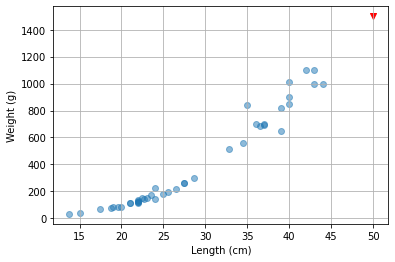

In [27]:
# 훈련 셋 시각화
plt.scatter(X_tr, y_tr, alpha=0.5)

# 가상의 물고기(농어) : 길이 50cm, 무게 1500g
plt.scatter(50, 1500, color='red', marker='v')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.show()

그림에서 알 수 있듯이, 훈련 데이터(농어 길이)의 최댓값 또는 최솟값에서 많이 벗어난 테스트 셋인 경우(outlier), 예측값을 가까운 이웃들의 평균값으로만 예측하기 때문에 그 평균값이 실제값과는 많이 다를 수 있음(오차가 클 수 있음).

In [28]:
# 길이 50cm인 가상의 물고기의 무게 예측값
prediction = knn_reg.predict([[50]])
prediction

array([1010.])

In [29]:
index = knn_reg.kneighbors([[50]], return_distance=False)
index # 50cm 물고기에서 가장 가까운 훈련셋 샘플 5개의 인덱스

array([[34, 14,  8, 40,  6]])

In [30]:
y_tr[index[0]]

array([1000., 1100., 1000., 1100.,  850.])

In [31]:
y_tr[index[0]].mean() # 50cm 물고기의 무게 예측값

1010.0

머신 러닝 알고리즘 :

*  사례 기반 학습(instance-based learning) : KNN(k-Nearest Neighbors), ...
    * 수학적인 모델을 만들지 않고 훈련 셋 데이터의 특징들을 사용해서 예측.
    * outlier들이 많은 경우에는 성능이 떨어질 수 있음.
*  모델 기반 학습(model-based learning) : Linear Regression, ...
    * 훈련 셋을 사용해서 수학적인 모델을 만들고 그 수학적인 모델로 예측값을 계산.

# Linear Regression

In [32]:
lin_reg = LinearRegression() # 선형 회귀 머신 러닝 모델 생성

In [33]:
lin_reg.fit(X_tr, y_tr) # 모델 학습(훈련) : y = ax + b 방정식의 계수(a, b)를 찾음.

LinearRegression()

In [34]:
# 선형 회귀 모델 학습 결과 (1) : 직선의 기울기. y=ax+b에서 a.
lin_reg.coef_

array([39.01714496])

In [35]:
# 선형 회귀 모델 학습 결과 (2) : 직선의 y절편. y=ax+b에서 b.
lin_reg.intercept_

-709.0186449535477

In [36]:
39 * 50 - 709 # 50cm 물고기의 무게 예측값

1241

In [37]:
# 훈련 셋의 예측값
tr_pred = lin_reg.predict(X_tr)
tr_pred[:4]

array([ 55.71739633, 149.35854425,  20.60196587, -30.12032259])

In [38]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [39]:
mean_squared_error(y_tr, tr_pred) # KNN보다 오차가 더 큼.

7422.953552609781

In [40]:
r2_score(y_tr, tr_pred)

0.939846333997604

In [41]:
lin_reg.score(X_tr, y_tr)

0.939846333997604

In [42]:
te_pred = lin_reg.predict(X_te) # 테스트 셋 예측값
te_pred

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [43]:
y_te # 테스트 셋 실제값

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [44]:
r2_score(y_te, te_pred) # KNN 결과보다 나쁨

0.8247503123313558

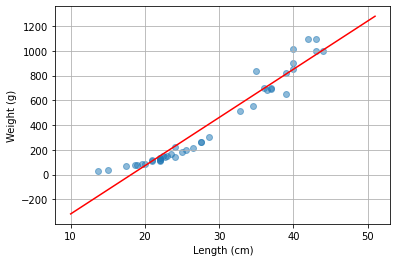

In [45]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5)

# y = ax + b : 선형 회귀식(직선의 방정식) - 선 그래프
a = lin_reg.coef_[0] # 직선의 기울기
b = lin_reg.intercept_ # 직선의 y절편
x = np.arange(10, 51, 0.001)
y = a * x + b
plt.plot(x, y, 'r-')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.show()

In [46]:
Xb = np.c_[X_tr, np.ones(len(X_tr))]

In [47]:
Xb.shape

(42, 2)

In [48]:
Xb[:5]

array([[19.6,  1. ],
       [22. ,  1. ],
       [18.7,  1. ],
       [17.4,  1. ],
       [36. ,  1. ]])

In [49]:
Xb[-5:]

array([[37. ,  1. ],
       [22. ,  1. ],
       [25.6,  1. ],
       [42. ,  1. ],
       [34.5,  1. ]])

선형 회귀의 목적은 선형 회귀 방정식에서 예측하는 값과 실제값 사이의 오차들이 가장 작은 방정식을 찾는 것.
$$ y = X \cdot w $$
정규 방정식(Normal Equation)을 풀면 RMSE를 최소로 만드는 선형회귀식의 coefficients와 intercept를 계산할 수 있음.
$$ w = (X^{T} \cdot X)^{-1} \cdot X^{T} \cdot y$$
그래서, Linear Regression 알고리즘은 훈련 셋 데이터와 레이블을 사용해서 정규 방정식을 풀고 선형 회귀식(직선의 방정식)의 계수들을 찾음.

In [50]:
# Linear Regression 알고리즘은 훈련 셋 데이터와 레이블을 사용해서
# 정규 방정식을 풀고 선형 회귀식(직선의 방정식)의 계수들을 찾음.
# 정규 방정식(Normal Equation)을 풀면 선형 회귀식의 Coefficients와 intercept를 계산할 수 있음.
np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y_tr

array([  39.01714496, -709.01864495])

# 2차항을 포함하는 선형 회귀

In [51]:
X_tr.shape, y_tr.shape

((42, 1), (42,))

In [52]:
X_tr[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [53]:
# 2차항을 추가한 훈련 셋
X_tr_poly = np.c_[X_tr ** 2, X_tr]
X_tr_poly.shape

(42, 2)

In [54]:
X_tr_poly[:5] # Length와 Length^2을 컬럼으로 갖는 2차원 배열 → 2차 선형 회귀에서 학습시킬 데이터

array([[ 384.16,   19.6 ],
       [ 484.  ,   22.  ],
       [ 349.69,   18.7 ],
       [ 302.76,   17.4 ],
       [1296.  ,   36.  ]])

In [55]:
lin_reg.fit(X_tr_poly, y_tr) # 2차항을 가지고 있는 데이터로 회귀 모델을 학습시킴.

LinearRegression()

In [56]:
lin_reg.coef_

array([  1.01433211, -21.55792498])

In [57]:
lin_reg.intercept_

116.0502107827827

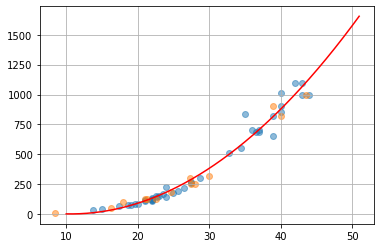

In [58]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5)
# 테스트 셋 산점도
plt.scatter(X_te, y_te, alpha=0.5)

# 2차항을 포함하는 선형 회귀식 : y = ax^2 + bx + c
x = np.arange(10, 51, 0.001)
Xb = np.c_[x**2, x]
y = Xb @ lin_reg.coef_ + lin_reg.intercept_
plt.plot(x, y, 'r-')

plt.grid()
plt.show()

# 비교

훈련 셋에서 RMSE, R2 score

테스트 셋에서 RMSE, R2 score

1차항만 있는 경우와 비교, KNN Regressor와 비교

In [59]:
# KNN Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_tr, y_tr)
tr_pred_kn = knn_reg.predict(X_tr)
print('RMSE :', round( np.sqrt(mean_squared_error(y_tr, tr_pred_kn)) , 4))
print('R2 score :', round( r2_score(y_tr, tr_pred_kn), 4))

RMSE : 60.9632
R2 score : 0.9699


In [60]:
# 1차항
lin_reg = LinearRegression()
lin_reg.fit(X_tr, y_tr)
tr_pred_1 = lin_reg.predict(X_tr)
print('RMSE :', round( np.sqrt(mean_squared_error(y_tr, tr_pred_1)), 4))
print('R2 score :', round(r2_score(y_tr, tr_pred_1), 4))

RMSE : 86.1566
R2 score : 0.9398


In [61]:
# 2차항
lin_reg2 = LinearRegression()
X_tr_poly = np.c_[X_tr ** 2, X_tr]
lin_reg2.fit(X_tr_poly, y_tr)
tr_pred_2 = lin_reg2.predict(X_tr_poly)
print('RMSE :', round( np.sqrt(mean_squared_error(y_tr, tr_pred_2)), 4))
print('R2 score :', round(r2_score(y_tr, tr_pred_2), 4))

RMSE : 60.1497
R2 score : 0.9707


In [62]:
# KNN Regressor - Test
te_pred_kn = knn_reg.predict(X_te)
print('RMSE :', round(np.sqrt(mean_squared_error(y_te, te_pred_kn)), 4))
print('R2 score :', round(r2_score(y_te, te_pred_kn), 4))

RMSE : 26.8652
R2 score : 0.9928


In [63]:
# 1차항 - Test
te_pred_1 =lin_reg.predict(X_te)
print('RMSE :', round(np.sqrt(mean_squared_error(y_te, te_pred_1)), 4))
print('R2 score :', round(r2_score(y_te, te_pred_1), 4))

RMSE : 132.6283
R2 score : 0.8248


In [64]:
# 2차항 - Test
X_te_poly = np.c_[X_te ** 2, X_te]
te_pred_2 = lin_reg2.predict(X_te_poly)
print('RMSE :', round(np.sqrt(mean_squared_error(y_te, te_pred_2)), 4))
print('R2 score :', round(r2_score(y_te, te_pred_2), 4))
# RMSE : KNN보다 오차 큼, R2 : KNN보다 작음

RMSE : 47.4236
R2 score : 0.9776


# Pipeline : PolynomialFeatures + LinearRegression

In [65]:
X_tr.shape, X_te.shape

((42, 1), (14, 1))

In [66]:
# Pipeline으로 연결할 변환기(Transformer)와 예측기(Estimator) 객체를 생성.
poly = PolynomialFeatures(degree=2, include_bias=False) # 변환기
lin_reg = LinearRegression() # 예측기

In [67]:
# 변환기 → 예측기 순서로 Pipeline 객체 생성
model = Pipeline([('poly', poly), ('reg', lin_reg)])

In [68]:
# 모델 훈련(fit) (1) poly.fit_transform() → (2) reg.fit()
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [69]:
# 훈련 셋 예측(predict) (1) poly.transform() → (2) reg.predict()
tr_pred = model.predict(X_tr)
tr_pred[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [70]:
tr_pred_2[:4]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559])

In [71]:
# 테스트 셋 예측
te_pred = model.predict(X_te)
te_pred[:4]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344])

In [72]:
te_pred_2[:4]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344])

# 농어의 모든 특성을 사용한 KNN Regression

* perch → X(2차원 배열), y(1차원 배열)
* train_test_split
* KNN 생성, 훈련, 예측, 평가
* LinearRegression 생성, 훈련, 예측, 평가
* 모든 특성들의 2차항까지 고려한 LinearRegression 훈련, 평가

In [73]:
X = perch[['Length', 'Diagonal', 'Height', 'Width']].values.copy()
y = perch['Weight'].values.copy()

In [74]:
# train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.25,
                                          random_state=42)

In [75]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

In [76]:
# KNN
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_tr, y_tr)
tr_pred = knn_reg.predict(X_tr)
te_pred = knn_reg.predict(X_te)

In [77]:
print("=== KNN Regression (Train) ===")
print("RMSE :", round(np.sqrt(mean_squared_error(y_tr, tr_pred)), 4))
print("R2 score :", round(knn_reg.score(X_tr, y_tr), 4))
print("\n=== KNN Regression (Test) ===")
print("RMSE :", round(np.sqrt(mean_squared_error(y_te, te_pred)), 4))
print("R2 score :", round(knn_reg.score(X_te, y_te), 4))
# Train < Test : 과소적합(Underfitting)

=== KNN Regression (Train) ===
RMSE : 54.6495
R2 score : 0.9758

=== KNN Regression (Test) ===
RMSE : 28.9363
R2 score : 0.9917


In [78]:
# LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_tr, y_tr)
tr_pred_1 = lin_reg.predict(X_tr)
te_pred_1 = lin_reg.predict(X_te)

In [79]:
print("=== Linear Regression (Train) ===")
print("RMSE :", round(np.sqrt(mean_squared_error(y_tr, tr_pred_1)),4))
print("R2 score :", round(lin_reg.score(X_tr, y_tr), 4))
print("\n=== Linear Regression (Test) ===")
print("RMSE :", round(np.sqrt(mean_squared_error(y_te, te_pred_1)), 4))
print("R2 score :", round(lin_reg.score(X_te, y_te),4))

=== Linear Regression (Train) ===
RMSE : 73.0765
R2 score : 0.9567

=== Linear Regression (Test) ===
RMSE : 110.1835
R2 score : 0.879


In [80]:
# 2차항을 포함한 훈련 셋
poly = PolynomialFeatures(degree=2, include_bias=False)
lin_reg = LinearRegression()
model = Pipeline([('poly', poly), ('reg', lin_reg)])
model.fit(X_tr, y_tr) # 모델 훈련

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('reg', LinearRegression())])

In [81]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [82]:
tr_pred_2 = model.predict(X_tr) # 훈련 셋 예측값
tr_pred_2[:4]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181])

In [83]:
te_pred_2 = model.predict(X_te)

In [84]:
print("=== Linear Regression(2nd) (Train) ===")
print('RMSE :', round(np.sqrt(mean_squared_error(y_tr, tr_pred_2)), 4))
print('R2 score :', round(r2_score(y_tr, tr_pred_2), 4))
print("=== Linear Regression(2nd) (Test) ===")
print('RMSE :', round(np.sqrt(mean_squared_error(y_te, te_pred_2)), 4))
print('R2 score :', round(r2_score(y_te, te_pred_2), 4))

=== Linear Regression(2nd) (Train) ===
RMSE : 31.4088
R2 score : 0.992
=== Linear Regression(2nd) (Test) ===
RMSE : 71.3639
R2 score : 0.9493
